In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# GroupBy
* 분리(split) - 적용(apply) - 결합(combine)

# Load Data & Structure

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [8]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [9]:
tips.index.nlevels

1

In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
tips.columns.nlevels

1

## example 1 : tips

성별 팁 평균 구하기의 예

1. split(분리) : 성별(Male, Female) 부분집합을 찾기
2. apply(적용) : 각 부분집합에서 팁 변수 평균 계산
3. combine(결합) : 2에서 계산된 결과를 하나로 합쳐서 표현

### 1.split

In [12]:
genders = tips['sex'].unique()
genders

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [13]:
female = tips[tips['sex'] == 'Female']
male = tips[tips['sex'] == 'Male']

In [14]:
female

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


### 2. apply

In [15]:
female_tip = female['tip'].mean()
male_tip = male['tip'].mean()

In [17]:
print('female tip mean:', female_tip)
print('male tip mean:', male_tip)

female tip mean: 2.833448275862069
male tip mean: 3.0896178343949052


### 3. combine

In [18]:
# genders=tips['sex'].unique()
s = pd.Series(data = [female_tip, male_tip], index = genders)
s

Female    2.833448
Male      3.089618
dtype: float64

In [19]:
df = pd.DataFrame(data = {'tip':[female_tip, male_tip]}, index = genders)
df

,tip
Female,2.833448
Male,3.089618


### groupby_mean() func. vs .pivot_table() method

In [20]:
def groupby_mean(df, by, value):
    """
    :param df: DataFrame
    :param by: str. coloumn name to divide group
    :param value: str. variable name to apply mean()
    :param func: np.func
    """
    categories = df[by].unique()
    mean_by_category = []
    for c in categories:
        subset = df[df[by] == c] #split
        avg = subset[value].mean() #apply
        mean_by_category.append(avg) #combine
    result = pd.DataFrame(data = {value : mean_by_category}, index = categories)
    
    return result

In [21]:
# function groupby_mean() has same skill as .pivot_table() function.
groupby_mean(df = tips, by = 'sex', value = 'tip')

,tip
Female,2.833448
Male,3.089618


In [22]:
tips.pivot_table(values = 'tip', index = 'sex', aggfunc = 'mean')

,tip
sex,
Male,3.089618
Female,2.833448


In [23]:
groupby_mean(df = tips, by = 'sex', value = 'total_bill')

,total_bill
Female,18.056897
Male,20.744076


In [24]:
tips[tips['sex'] == 'Female']['total_bill'].mean()

18.056896551724137

In [25]:
tips.pivot_table(index = 'sex', values = 'total_bill', aggfunc = 'mean')

,total_bill
sex,
Male,20.744076
Female,18.056897


In [26]:
groupby_mean(df = tips, by = 'day', value = 'tip')

,tip
Sun,3.255132
Sat,2.993103
Thur,2.771452
Fri,2.734737


In [27]:
tips[tips['day'] == 'Thur']['tip'].mean()

2.771451612903226

In [28]:
tips.pivot_table(index = 'day', values = 'tip', aggfunc = 'mean')

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


# pd.DataFrame.groupby() Method

## example 1 : tips / groupby 'sex'

In [29]:
# 성별로 그룹을 나눔
grouped = tips.groupby(by = 'sex')
grouped

In [30]:
for cls, subset in grouped:
    print('Class :', cls)
    print(subset)
    print('-' * 50, '\n')

Class: Male
     total_bill   tip   sex smoker  day    time  size
1         10.34  1.66  Male     No  Sun  Dinner     3
2         21.01  3.50  Male     No  Sun  Dinner     3
3         23.68  3.31  Male     No  Sun  Dinner     2
5         25.29  4.71  Male     No  Sun  Dinner     4
6          8.77  2.00  Male     No  Sun  Dinner     2
..          ...   ...   ...    ...  ...     ...   ...
236       12.60  1.00  Male    Yes  Sat  Dinner     2
237       32.83  1.17  Male    Yes  Sat  Dinner     2
239       29.03  5.92  Male     No  Sat  Dinner     3
241       22.67  2.00  Male    Yes  Sat  Dinner     2
242       17.82  1.75  Male     No  Sat  Dinner     2

[157 rows x 7 columns]
-------------------------------------------------- 

Class: Female
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02

## example 2 : tips / groupby 'day'

In [31]:
grouped = tips.groupby(by = 'day')
for cls, subset in grouped:
    print(cls)
    print(subset)
    print('-' * 50, '\n')

Thur
     total_bill   tip     sex smoker   day    time  size
77        27.20  4.00    Male     No  Thur   Lunch     4
78        22.76  3.00    Male     No  Thur   Lunch     2
79        17.29  2.71    Male     No  Thur   Lunch     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
81        16.66  3.40    Male     No  Thur   Lunch     2
..          ...   ...     ...    ...   ...     ...   ...
202       13.00  2.00  Female    Yes  Thur   Lunch     2
203       16.40  2.50  Female    Yes  Thur   Lunch     2
204       20.53  4.00    Male    Yes  Thur   Lunch     4
205       16.47  3.23  Female    Yes  Thur   Lunch     3
243       18.78  3.00  Female     No  Thur  Dinner     2

[62 rows x 7 columns]
-------------------------------------------------- 

Fri
     total_bill   tip     sex smoker  day    time  size
90        28.97  3.00    Male    Yes  Fri  Dinner     2
91        22.49  3.50    Male     No  Fri  Dinner     2
92         5.75  1.00  Female    Yes  Fri  Dinner     2
93     

## practical usage of groupby method

In [32]:
# average tip by sex : as pd.Series
tips.groupby(by = 'sex')['tip'].mean() #> Series: shape(2,)

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [33]:
# average tip by sex : as pd.DataFrame
tips.groupby(by = 'sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


## groupby() vs pivot_table()

### example 1: median of total_bill and tip by sex

In [34]:
# in case of groupby() method
g = tips.groupby(by = 'sex')[['total_bill', 'tip']].median()
g

,total_bill,tip
sex,,
Male,18.35,3.00
Female,16.40,2.75


In [35]:
# in case of pivot_table() method
p = tips.pivot_table(index = 'sex', values = ['total_bill', 'tip'], aggfunc = 'median')
p

,tip,total_bill
sex,,
Male,3.00,18.35
Female,2.75,16.40


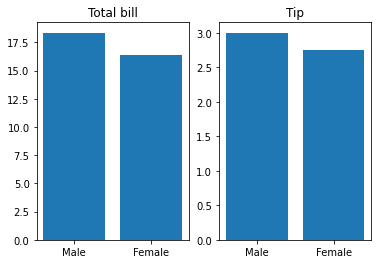

In [36]:
fig, axes=plt.subplots(nrows = 1, ncols = 2)

axes[0].bar(x = g.index, height = g['total_bill'])
axes[1].bar(x = g.index, height = g['tip'])

axes[0].set_title('Total bill')
axes[1].set_title('Tip')

plt.show()

### example 2: mean of tip by sex, smoker or not

In [37]:
g=tips.groupby(by=['sex', 'smoker'])[['tip']].mean()
g

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [39]:
# unstack() method : change multi-index to column
df = g.unstack()
df

tip          
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519

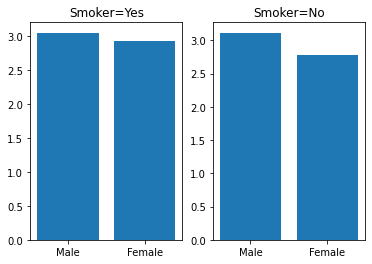

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].bar(x = df.index, height = df[('tip', 'Yes')])
axes[1].bar(x = df.index, height = df[('tip', 'No')])

axes[0].set_title('Smoker = Yes')
axes[1].set_title('Smoker = No')

plt.show()

In [41]:
g.unstack()[('tip', 'No')]

sex
Male      3.113402
Female    2.773519
Name: (tip, No), dtype: float64

In [42]:
tips.pivot_table(index = ['sex', 'smoker'], values = 'tip')

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [43]:
tips.pivot_table(index = 'sex', columns = 'smoker', values = 'tip')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


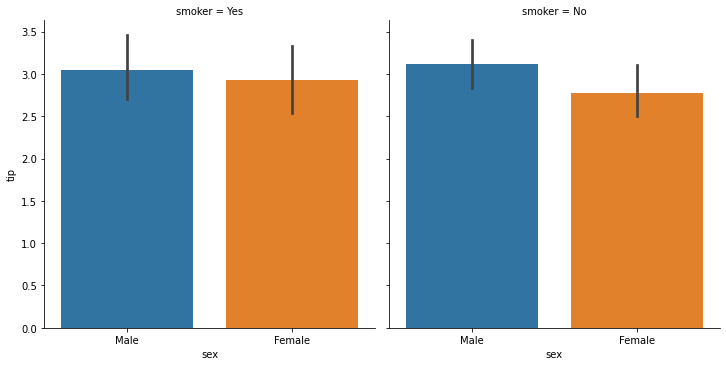

In [44]:
sns.catplot(data = tips, x = 'sex', y = 'tip', col = 'smoker', kind = 'bar')
plt.show()

### example 3: max tip by sex

In [45]:
tips.groupby(by = 'sex')[['tip']].max()

,tip
sex,
Male,10.0
Female,6.5


In [46]:
tips.pivot_table(values = 'tip', index = 'sex', aggfunc = 'max')

,tip
sex,
Male,10.0
Female,6.5


### example 4: min tip by sex

In [47]:
tips.groupby(by = 'sex')[['tip']].min()

,tip
sex,
Male,1.0
Female,1.0


In [48]:
tips.pivot_table(values = 'tip', index = 'sex', aggfunc = ['max', 'min'])

,max,min
,tip,tip
sex,,
Male,10.0,1.0
Female,6.5,1.0


### example 5: median of tip by sex, time

In [50]:
g = tips.groupby(by = ['sex', 'time'])[['tip']].median()
g

tip
sex    time        
Male   Lunch   2.31
       Dinner  3.00
Female Lunch   2.01
       Dinner  3.00

In [52]:
# change multi-level index to columns
g.unstack()

tip       
time   Lunch Dinner
sex                
Male    2.31    3.0
Female  2.01    3.0

In [53]:
g.unstack(level = 0)

tip       
sex     Male Female
time               
Lunch   2.31   2.01
Dinner  3.00   3.00

In [54]:
tips.pivot_table(values = 'tip', index = ['sex', 'time'], aggfunc = 'median')

tip
sex    time        
Male   Lunch   2.31
       Dinner  3.00
Female Lunch   2.01
       Dinner  3.00

In [55]:
tips.pivot_table(values = 'tip', index = 'sex', columns = 'time', aggfunc = 'median')

time,Lunch,Dinner
sex,,
Male,2.31,3.0
Female,2.01,3.0


### example 6: median of total_bill by sex, time, day

In [56]:
g = tips.groupby(by = ['sex','time','day'])[['total_bill']].median()
g

total_bill
sex    time   day             
Male   Lunch  Thur      16.975
              Fri       12.160
              Sat          NaN
              Sun          NaN
       Dinner Thur         NaN
              Fri       22.490
              Sat       18.240
              Sun       20.725
Female Lunch  Thur      13.420
              Fri       14.700
              Sat          NaN
              Sun          NaN
       Dinner Thur      18.780
              Fri       15.380
              Sat       18.360
              Sun       17.410

In [57]:
# change multi-level index to columns
g.unstack()

total_bill                      
day                 Thur    Fri    Sat     Sun
sex    time                                   
Male   Lunch      16.975  12.16    NaN     NaN
       Dinner        NaN  22.49  18.24  20.725
Female Lunch      13.420  14.70    NaN     NaN
       Dinner     18.780  15.38  18.36  17.410

In [58]:
g.unstack(level = [1, 2])

total_bill                                            
time        Lunch                Dinner                      
day          Thur    Fri Sat Sun   Thur    Fri    Sat     Sun
sex                                                          
Male       16.975  12.16 NaN NaN    NaN  22.49  18.24  20.725
Female     13.420  14.70 NaN NaN  18.78  15.38  18.36  17.410

In [59]:
tips.pivot_table(values = 'tip', index = ['sex', 'time', 'day'], aggfunc = 'median')

tip
sex    time   day        
Male   Lunch  Thur  2.530
              Fri   1.920
       Dinner Fri   3.000
              Sat   3.000
              Sun   3.085
Female Lunch  Thur  2.000
              Fri   2.750
       Dinner Thur  3.000
              Fri   3.000
              Sat   2.625
              Sun   3.500

In [60]:
tips.pivot_table(values = 'tip', index = ['sex','time'], columns = ['day'], aggfunc = 'median')

day            Thur   Fri    Sat    Sun
sex    time                            
Male   Lunch   2.53  1.92    NaN    NaN
       Dinner   NaN  3.00  3.000  3.085
Female Lunch   2.00  2.75    NaN    NaN
       Dinner  3.00  3.00  2.625  3.500

In [61]:
tips.pivot_table(values = 'tip', index = 'sex', columns = ['time', 'day'], aggfunc = 'median', dropna = False)

time   Lunch               Dinner                   
day     Thur   Fri Sat Sun   Thur  Fri    Sat    Sun
sex                                                 
Male    2.53  1.92 NaN NaN    NaN  3.0  3.000  3.085
Female  2.00  2.75 NaN NaN    3.0  3.0  2.625  3.500

### example 7: median of total_bill by sex, smoker or not, time, day

In [62]:
g = tips.groupby(by = ['sex', 'smoker', 'time', 'day'])[['total_bill']].median()
g

total_bill
sex    smoker time   day             
Male   Yes    Lunch  Thur      17.645
                     Fri       12.160
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       27.280
                     Sat       20.290
                     Sun       23.330
       No     Lunch  Thur      16.975
                     Fri          NaN
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       17.475
                     Sat       17.870
                     Sun       19.490
Female Yes    Lunch  Thur      16.400
                     Fri       13.420
                     Sat          NaN
                     Sun          NaN
              Dinner Thur         NaN
                     Fri       13.365
                     Sat       22.120
                     Sun       17.830
       No     Lunch  Thur      13.290
                     Fri       15.980
                     Sat          NaN
                     Sun          NaN
              Dinner Thur      18.780
                     Fri       22.750
                     Sat       17.070
                     Sun       17.150

### example 8: mean of total_bill by sex, smoker, time, day

In [63]:
g = tips.groupby(by = ['sex', 'smoker', 'time', 'day'])[['total_bill', 'tip']].mean()
g

total_bill       tip
sex    smoker time   day                       
Male   Yes    Lunch  Thur   19.171000  3.058000
                     Fri    11.386667  1.900000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    25.892000  3.246000
                     Sat    21.837778  2.879259
                     Sun    26.141333  3.521333
       No     Lunch  Thur   18.486500  2.941500
                     Fri          NaN       NaN
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    17.475000  2.500000
                     Sat    19.929063  3.256563
                     Sun    20.403256  3.115349
Female Yes    Lunch  Thur   19.218571  2.990000
                     Fri    13.260000  2.660000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur         NaN       NaN
                     Fri    12.200000  2.700000
                     Sat    20.266667  2.868667
                     Sun    16.540000  3.500000
       No     Lunch  Thur   15.899167  2.437083
                     Fri    15.980000  3.000000
                     Sat          NaN       NaN
                     Sun          NaN       NaN
              Dinner Thur   18.780000  3.000000
                     Fri    22.750000  3.250000
                     Sat    19.003846  2.724615
                     Sun    20.824286  3.329286

# Applying more than 2 aggfunc.

## 1 variable, more than 2 aggfunc.

In [64]:
# max,min tip by time
tips.groupby(by = 'time')[['tip']].aggregate(['min', 'max'])
# aggregate()=agg()

tip      
         min   max
time              
Lunch   1.25   6.7
Dinner  1.00  10.0

In [65]:
tips.pivot_table(values = 'tip', index = 'time', aggfunc = ['min', 'max'])

,min,max
,tip,tip
time,,
Lunch,1.25,6.7
Dinner,1.00,10.0


## more than 2 variables, more than 2 aggfunc.

In [67]:
# min, max of total_bill and tip, by time
tips.groupby(by = 'time')[['total_bill', 'tip']].agg(['min', 'max'])

total_bill          tip      
              min    max   min   max
time                                
Lunch        7.51  43.11  1.25   6.7
Dinner       3.07  50.81  1.00  10.0

In [68]:
tips.pivot_table(values = ['total_bill', 'tip'], index = 'time', aggfunc = ['min', 'max'])

min              max           
         tip total_bill   tip total_bill
time                                    
Lunch   1.25       7.51   6.7      43.11
Dinner  1.00       3.07  10.0      50.81

# Applying different aggfunc. to more than 2 variables

In [69]:
# mean of total_bill by time, max-min of tip : to use dict in agg()
tips.groupby(by = 'time')[['total_bill','tip']].agg({'total_bill' : 'mean',
                                                     'tip' : ['min', 'max']})

total_bill   tip      
             mean   min   max
time                         
Lunch   17.168676  1.25   6.7
Dinner  20.797159  1.00  10.0

In [70]:
tips.pivot_table(values = ['total_bill', 'tip'],
                 index = 'time',
                 aggfunc = {'total_bill' : 'mean',
                            'tip' : ['min', 'max']})

tip       total_bill
         max   min       mean
time                         
Lunch    6.7  1.25  17.168676
Dinner  10.0  1.00  20.797159

## example 1: tips
* Add derived variable named tip_pct. tip_pct=tip/total_bill
* Find mean of total_bill by time, smoker or not, day
* Find mean and std.dev of tip_pct
* Find max, min of tip

In [71]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [72]:
tips.groupby(by = ['time', 'smoker', 'day'])[['total_bill', 'tip_pct', 'tip']].agg({'total_bill' : 'mean',
                                                                                    'tip_pct' : ['mean', 'std'],
                                                                                    'tip' : ['min', 'max']})

total_bill   tip_pct             tip       
                         mean      mean       std   min    max
time   smoker day                                             
Lunch  Yes    Thur  19.190588  0.163863  0.039389  2.00   5.00
              Fri   12.323333  0.188937  0.050262  1.58   3.48
              Sat         NaN       NaN       NaN   NaN    NaN
              Sun         NaN       NaN       NaN   NaN    NaN
       No     Thur  17.075227  0.160311  0.039222  1.25   6.70
              Fri   15.980000  0.187735       NaN  3.00   3.00
              Sat         NaN       NaN       NaN   NaN    NaN
              Sun         NaN       NaN       NaN   NaN    NaN
Dinner Yes    Thur        NaN       NaN       NaN   NaN    NaN
              Fri   19.806667  0.165347  0.052676  1.00   4.73
              Sat   21.276667  0.147906  0.061375  1.00  10.00
              Sun   24.120000  0.187250  0.154134  1.50   6.50
       No     Thur  18.780000  0.159744       NaN  3.00   3.00
              Fri   19.233333  0.139622  0.017841  1.50   3.50
              Sat   19.661778  0.158048  0.039767  1.00   9.00
              Sun   20.506667  0.160113  0.042347  1.01   6.00

## example 2: gapminder
* read gapminder.tsv and create DataFrame
* aggregate population by year and continent using groupby() method.
* aggregate population by year and continent using pivot_table() method.
* Reshape result of groupby to draw line graph(axis x: year, axis y:population, hue:continent)
* visualize line graph.

### 1. Read gapminder.tsv and Create DataFrame

In [73]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/gapminder.tsv'
gapminder = pd.read_csv(file_path, sep = '\t')
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [74]:
gapminder.shape

(1704, 6)

In [75]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 2. aggregate population by year and continent using groupby() method.

In [76]:
grouped = gapminder.groupby(['year', 'continent'])[['pop']].sum()
grouped

pop
year continent            
1952 Africa      237640501
     Americas    345152446
     Asia       1395357351
     Europe      418120846
     Oceania      10686006
1957 Africa      264837738
     Americas    386953916
     Asia       1562780599
     Europe      437890351
     Oceania      11941976
1962 Africa      296516865
     Americas    433270254
     Asia       1696357182
     Europe      460355155
     Oceania      13283518
1967 Africa      335289489
     Americas    480746623
     Asia       1905662900
     Europe      481178958
     Oceania      14600414
1972 Africa      379879541
     Americas    529384210
     Asia       2150972248
     Europe      500635059
     Oceania      16106100
1977 Africa      433061021
     Americas    578067699
     Asia       2384513556
     Europe      517164531
     Oceania      17239000
1982 Africa      499348587
     Americas    630290920
     Asia       2610135582
     Europe      531266901
     Oceania      18394850
1987 Africa      574834110
     Americas    682753971
     Asia       2871220762
     Europe      543094160
     Oceania      19574415
1992 Africa      659081517
     Americas    739274104
     Asia       3133292191
     Europe      558142797
     Oceania      20919651
1997 Africa      743832984
     Americas    796900410
     Asia       3383285500
     Europe      568944148
     Oceania      22241430
2002 Africa      833723916
     Americas    849772762
     Asia       3601802203
     Europe      578223869
     Oceania      23454829
2007 Africa      929539692
     Americas    898871184
     Asia       3811953827
     Europe      586098529
     Oceania      24549947

### Reshape result of groupby to draw line graph(axis x: year, axis y:population, hue:continent)

In [77]:
df = grouped.unstack()
df

pop                                            
continent     Africa   Americas        Asia     Europe   Oceania
year                                                            
1952       237640501  345152446  1395357351  418120846  10686006
1957       264837738  386953916  1562780599  437890351  11941976
1962       296516865  433270254  1696357182  460355155  13283518
1967       335289489  480746623  1905662900  481178958  14600414
1972       379879541  529384210  2150972248  500635059  16106100
1977       433061021  578067699  2384513556  517164531  17239000
1982       499348587  630290920  2610135582  531266901  18394850
1987       574834110  682753971  2871220762  543094160  19574415
1992       659081517  739274104  3133292191  558142797  20919651
1997       743832984  796900410  3383285500  568944148  22241430
2002       833723916  849772762  3601802203  578223869  23454829
2007       929539692  898871184  3811953827  586098529  24549947

### Aggregate population by year and continent using pivot_table() method.

In [78]:
gapminder.pivot_table(values = 'pop', index = 'year', columns = 'continent', aggfunc = 'sum')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,237640501,345152446,1395357351,418120846,10686006
1957,264837738,386953916,1562780599,437890351,11941976
1962,296516865,433270254,1696357182,460355155,13283518
1967,335289489,480746623,1905662900,481178958,14600414
1972,379879541,529384210,2150972248,500635059,16106100
1977,433061021,578067699,2384513556,517164531,17239000
1982,499348587,630290920,2610135582,531266901,18394850
1987,574834110,682753971,2871220762,543094160,19574415
1992,659081517,739274104,3133292191,558142797,20919651


In [79]:
df.columns

MultiIndex([('pop',   'Africa'),
            ('pop', 'Americas'),
            ('pop',     'Asia'),
            ('pop',   'Europe'),
            ('pop',  'Oceania')],
           names=[None, 'continent'])

### visualize line graph(axis x: year, axis y:population, hue:continent)

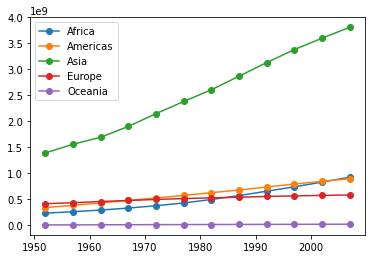

In [80]:
for col in df.columns:
    plt.plot(df.index, df[col], 'o-', label = col[1])

plt.legend()
plt.show()

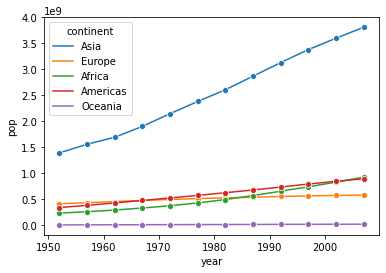

In [81]:
sns.lineplot(data = gapminder, x = 'year', y = 'pop', hue = 'continent', estimator = 'sum',
             err_style = None, marker = 'o')
plt.show()

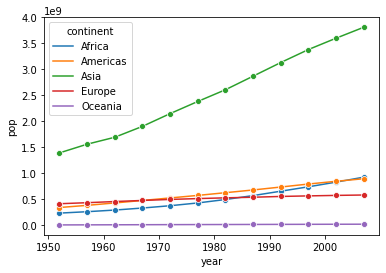

In [82]:
sns.lineplot(data = grouped, x = 'year', y = 'pop', hue = 'continent', marker = 'o')
plt.show()

In [83]:
df.head()

pop                                            
continent     Africa   Americas        Asia     Europe   Oceania
year                                                            
1952       237640501  345152446  1395357351  418120846  10686006
1957       264837738  386953916  1562780599  437890351  11941976
1962       296516865  433270254  1696357182  460355155  13283518
1967       335289489  480746623  1905662900  481178958  14600414
1972       379879541  529384210  2150972248  500635059  16106100

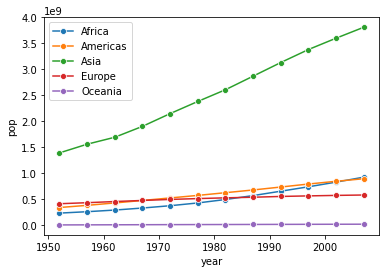

In [84]:
for col in df.columns:
    sns.lineplot(data = df, x = 'year', y = col, marker = 'o', label = col[1])
plt.ylabel('pop')
plt.show()